In [10]:
import pandas as pd
df=pd.read_csv("heart.csv")
df.head()
from sklearn.model_selection import train_test_split

In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [26]:
selected_features = ["age","restecg","cp","trestbps","chol"] 
target_label = "target"

In [27]:
correlation_matrix = df[selected_features + [target_label]].corr()
print(correlation_matrix)

               age   restecg        cp  trestbps      chol    target
age       1.000000 -0.116211 -0.068653  0.279351  0.213678 -0.225439
restecg  -0.116211  1.000000  0.044421 -0.114103 -0.151040  0.137230
cp       -0.068653  0.044421  1.000000  0.047608 -0.076904  0.433798
trestbps  0.279351 -0.114103  0.047608  1.000000  0.123174 -0.144931
chol      0.213678 -0.151040 -0.076904  0.123174  1.000000 -0.085239
target   -0.225439  0.137230  0.433798 -0.144931 -0.085239  1.000000


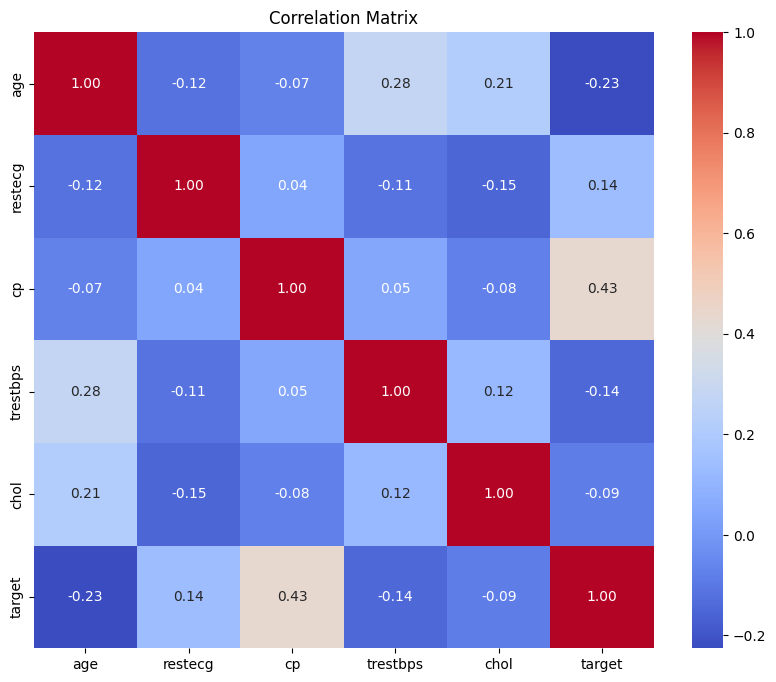

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [31]:
y=df["target"]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(df[["age","sex","cp","trestbps","chol","restecg","thalach","exang","oldpeak","slope","ca","thal"]],y,test_size=0.2,random_state=5)


In [33]:
y_train.shape

(242,)

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [19]:
print(X_train[["age"]])
print(X_train.shape)
print(y_train.shape)
print(df.target.shape)
print(df['target'].shape)

     age
266   55
215   43
99    53
119   46
11    48
..   ...
8     52
73    51
118   46
189   41
206   59

[242 rows x 1 columns]
(242, 12)
(242,)
(303,)
(303,)


In [34]:
f=model.predict(X_test)
score=model.score(X_test,y_test)
print(score)
import matplotlib.pyplot as plt
%matplotlib inline

0.9016393442622951


In [36]:
print(X_test.shape)
print(f.shape)
print(df[["age"]].shape)


(61, 12)
(61,)
(303, 1)
